In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt
import math

## Анализ данных

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [5]:
df.shape

(122410, 97)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [6]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [7]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

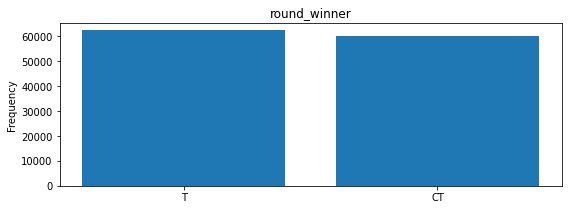

round_winner: 
 T     62406
CT    60004
Name: round_winner, dtype: int64


In [8]:
bar_plot('round_winner')

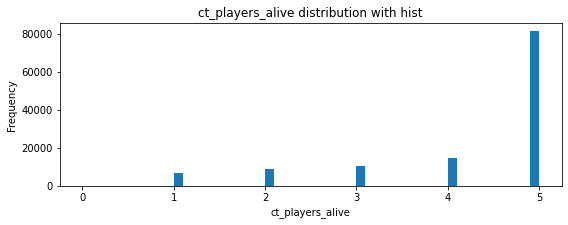

In [9]:
plot_hist('ct_players_alive')

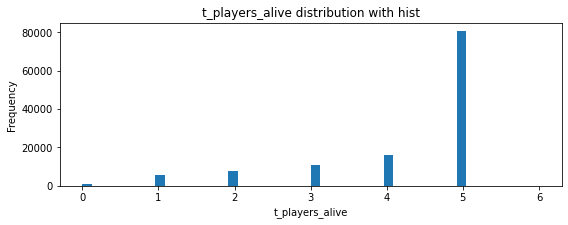

In [10]:
plot_hist('t_players_alive')

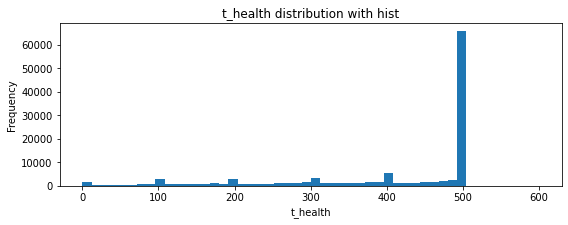

In [11]:
plot_hist('t_health')

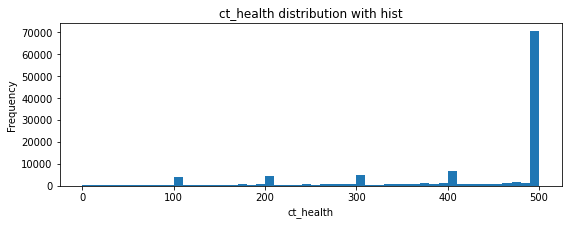

In [12]:
plot_hist('ct_health')

# Начало пути

Делаем маленький датасет

In [13]:
df_toy = df[['ct_score', 't_score', 'map', 'bomb_planted', 'ct_players_alive', 't_players_alive', 'ct_health', 't_health', 'round_winner']]

In [14]:
df_toy.head()

,ct_score,t_score,map,bomb_planted,ct_players_alive,t_players_alive,ct_health,t_health,round_winner
0,0.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT
1,0.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT
2,0.0,0.0,de_dust2,False,4.0,4.0,391.0,400.0,CT
3,0.0,0.0,de_dust2,False,4.0,4.0,391.0,400.0,CT
4,1.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT


## Обучим дерево решений на небольшом примере

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [15]:
df_toy = df[['ct_score', 't_score', 'map', 'bomb_planted', 'ct_players_alive', 't_players_alive', 'ct_health', 't_health', 'round_winner']]

In [16]:
df_toy.head()

,ct_score,t_score,map,bomb_planted,ct_players_alive,t_players_alive,ct_health,t_health,round_winner
0,0.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT
1,0.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT
2,0.0,0.0,de_dust2,False,4.0,4.0,391.0,400.0,CT
3,0.0,0.0,de_dust2,False,4.0,4.0,391.0,400.0,CT
4,1.0,0.0,de_dust2,False,5.0,5.0,500.0,500.0,CT


1. перевести все категориальные переменные в числовые
2. разделить выборку на тренировочную и тестовую
3. обучить DecisionTreeClassifier
4. вывести метрики из classification_report

In [17]:
df_toy['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [18]:
df_toy.columns

Index(['ct_score', 't_score', 'map', 'bomb_planted', 'ct_players_alive',
       't_players_alive', 'ct_health', 't_health', 'round_winner'],
      dtype='object')

In [19]:
df_toy = pd.get_dummies(df_toy, columns = ['map', 'bomb_planted'])
df_toy

,ct_score,t_score,ct_players_alive,t_players_alive,ct_health,t_health,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,0.0,0.0,5.0,5.0,500.0,500.0,CT,0,1,0,0,0,0,0,0,1,0
1,0.0,0.0,5.0,5.0,500.0,500.0,CT,0,1,0,0,0,0,0,0,1,0
2,0.0,0.0,4.0,4.0,391.0,400.0,CT,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,4.0,4.0,391.0,400.0,CT,0,1,0,0,0,0,0,0,1,0
4,1.0,0.0,5.0,5.0,500.0,500.0,CT,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,11.0,14.0,2.0,4.0,200.0,242.0,T,0,0,0,0,0,0,1,0,0,1
122406,11.0,15.0,5.0,5.0,500.0,500.0,T,0,0,0,0,0,0,1,0,1,0
122407,11.0,15.0,5.0,5.0,500.0,500.0,T,0,0,0,0,0,0,1,0,1,0
122408,11.0,15.0,5.0,5.0,500.0,500.0,T,0,0,0,0,0,0,1,0,1,0


In [20]:
df_toy['round_winner'] = df_toy['round_winner'].apply(lambda x: 1 if x == 'CT' else 0)
df_toy

,ct_score,t_score,ct_players_alive,t_players_alive,ct_health,t_health,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,0.0,0.0,5.0,5.0,500.0,500.0,1,0,1,0,0,0,0,0,0,1,0
1,0.0,0.0,5.0,5.0,500.0,500.0,1,0,1,0,0,0,0,0,0,1,0
2,0.0,0.0,4.0,4.0,391.0,400.0,1,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,4.0,4.0,391.0,400.0,1,0,1,0,0,0,0,0,0,1,0
4,1.0,0.0,5.0,5.0,500.0,500.0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,11.0,14.0,2.0,4.0,200.0,242.0,0,0,0,0,0,0,0,1,0,0,1
122406,11.0,15.0,5.0,5.0,500.0,500.0,0,0,0,0,0,0,0,1,0,1,0
122407,11.0,15.0,5.0,5.0,500.0,500.0,0,0,0,0,0,0,0,1,0,1,0
122408,11.0,15.0,5.0,5.0,500.0,500.0,0,0,0,0,0,0,0,1,0,1,0


In [21]:
y = df_toy['round_winner']
X = df_toy.drop(['round_winner'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 42)

In [23]:
X_train.shape

(85687, 16)

In [24]:
y_train.shape

(85687,)

In [25]:
X_test.shape

(36723, 16)

In [26]:
y_test.shape

(36723,)

In [27]:
dt_clf = DecisionTreeClassifier(max_depth=3) #создаем дерево
dt_clf.fit(X_train,y_train) #учим
pred = dt_clf.predict(X_test) #просим результат предикта

In [28]:
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.27      0.41     18669
           1       0.56      0.96      0.71     18054

    accuracy                           0.61     36723
   macro avg       0.71      0.61      0.56     36723
weighted avg       0.72      0.61      0.56     36723



[Text(0.5, 0.875, 'X[2] <= 2.5\ngini = 0.5\nsamples = 85687\nvalue = [43737, 41950]'),
 Text(0.25, 0.625, 'X[3] <= 1.5\ngini = 0.335\nsamples = 10780\nvalue = [8482, 2298]'),
 Text(0.125, 0.375, 'X[2] <= 1.5\ngini = 0.405\nsamples = 2220\nvalue = [626, 1594]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 936\nvalue = [443, 493]'),
 Text(0.1875, 0.125, 'gini = 0.244\nsamples = 1284\nvalue = [183, 1101]'),
 Text(0.375, 0.375, 'X[3] <= 2.5\ngini = 0.151\nsamples = 8560\nvalue = [7856, 704]'),
 Text(0.3125, 0.125, 'gini = 0.355\nsamples = 2253\nvalue = [1733, 520]'),
 Text(0.4375, 0.125, 'gini = 0.057\nsamples = 6307\nvalue = [6123, 184]'),
 Text(0.75, 0.625, 'X[3] <= 2.5\ngini = 0.498\nsamples = 74907\nvalue = [35255, 39652]'),
 Text(0.625, 0.375, 'X[3] <= 1.5\ngini = 0.158\nsamples = 5784\nvalue = [501, 5283]'),
 Text(0.5625, 0.125, 'gini = 0.024\nsamples = 2673\nvalue = [32, 2641]'),
 Text(0.6875, 0.125, 'gini = 0.256\nsamples = 3111\nvalue = [469, 2642]'),
 Text(0.875, 0.375, 'X[2] <

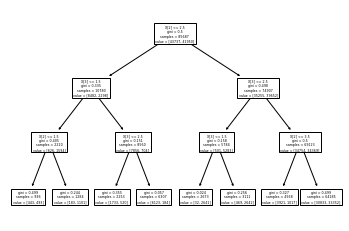

In [29]:
plot_tree(dt_clf)

In [30]:
export_graphviz(dt_clf, feature_names=X.columns, out_file='dec_tree.dot', filled=True)

In [31]:
!dot -Tpng 'dec_tree.dot' -o 'dec_tree.png'

Подбираем параметры

In [32]:
params = {
    'max_leaf_nodes': list(range(2, 10)),
    'min_samples_split': [2, 3, 4],
    'max_depth': [3,5,7],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=9, random_state=42)

In [33]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=9, random_state=42)

In [34]:
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [35]:
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.27      0.41     18669
           1       0.56      0.96      0.71     18054

    accuracy                           0.61     36723
   macro avg       0.71      0.61      0.56     36723
weighted avg       0.72      0.61      0.56     36723



In [36]:
best_dt = grid_search_cv.best_estimator_.predict(X_test)
cr = classification_report(y_test,best_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.88      0.71     18669
           1       0.76      0.39      0.52     18054

    accuracy                           0.64     36723
   macro avg       0.68      0.63      0.61     36723
weighted avg       0.68      0.64      0.62     36723



## Обучим  KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
#1. обучить KNeighborsClassifier
#2. построить confusion_matrix

Подбираем параметры

In [ ]:
#1. Используем GridSearchCV, подбираем те параметры, которые можно

## А теперь все то же самое, только на всем датасете!